In [1]:
import json
import os
import re

In [2]:
ARTIST_FILE = 'C:/Chris Liu/清华/25暑期/python-course/song_curl/saved_info/artist_info/artist_intro'
artist_files = os.listdir(ARTIST_FILE)
artists_info = []
for file in artist_files:
    with open(f"{ARTIST_FILE}/{file}", 'r', encoding='utf-8') as f:
        artist = json.load(f)
        artists_info.append(artist)

artists_info

[{'name': '周深',
  'alias': [''],
  'url': 'https://music.163.com/artist/desc?id=1030001',
  'id': 1030001,
  'intro': {'intro': '周深，1992年9月29日出生，贵州贵阳人，浙江卫视《中国好声音》第三季学员，所属那英团队。\n2014年，参加浙江卫视《中国好声音》第三季第二期，以一首齐豫的《欢颜》获得导师们的赞赏；9月1日在《中国好声音重返巅峰》节目，带着一首《美错》，赢得了陈晓东和王治平的充分的肯定；10月7日，参加《好声音总决赛》，凭借《贝加尔湖畔》获得“中国好声音”年度金曲。2015年春节大年初一北京卫视春晚献唱多语版《Let it go》支持北京申办冬奥会。2015年4月为电影《何以笙箫默》片头片尾配唱人声SOLO《You Are My Sunshine》。7月发行首张翻唱专辑《回味》并举办新专辑首唱会。8月发行个人全新单曲《玫瑰与小鹿》。'}},
 {'name': '鹿晗',
  'alias': [''],
  'url': 'https://music.163.com/artist/desc?id=1038093',
  'id': 1038093,
  'intro': {'intro': '鹿晗（LU HAN），1990年4月20日出生于北京，中国男演员、歌手。\n2008年，鹿晗赴韩国留学，留学期间在明洞逛街时被韩国SM娱乐公司星探发掘。2010年签约成为旗下练习生。2011年12月27日通过EXO官网公开写真和预告视频与公众见面。2012年4月8日以EXO/EXO-M组合成员身份正式出道，在组合里担任主唱、领舞、门面担当。2013年7月-9月，在组合首张专辑剧情版录影带上、下两部中担任男主角。2014年6月，出演导演陈正道执导的中韩合拍电影《重返20岁》。8月19日，个人微博单条评论创吉尼斯世界纪录，成为中国中文社交媒体的第一个对外公布认证的吉尼斯世界纪录缔造者。10月10日，鹿晗由代理律师向韩国首尔地方法院递交起诉书，申请与SM公司合同无效。12月2日，鹿晗为自己主演的电影《重返20岁》演唱的电影主题曲《我们的明天》正式发行。2015年1月8日，鹿晗主演的首部电影《重返20岁》正式上映，以3.8亿票房刷新中韩合拍片

In [3]:
artists_intro_length = []
for artist in artists_info:
    intro = artist['intro']
    intro_length = len(intro['intro'])
    if intro.get('history') is not None:
        intro_length += len(intro['history'])
    if intro.get('master_work') is not None:
        for work in intro['master_work']:
            intro_length += len(work)
    if intro.get('milestones') is not None:
        for milestone in intro['milestones']:
            intro_length += len(milestone)
    artists_intro_length.append(intro_length)

artists_intro_length
    

[313,
 1055,
 343,
 75,
 35,
 943,
 31,
 292,
 12,
 71,
 820,
 57,
 28,
 56,
 18,
 229,
 197,
 10,
 57,
 1435,
 256,
 12,
 15,
 96,
 49,
 35,
 680,
 50,
 38,
 392,
 41,
 148,
 22,
 56,
 495,
 2640,
 5158,
 258,
 665,
 100,
 1199,
 1287,
 92,
 14,
 72,
 49,
 107,
 50,
 3660,
 162,
 306,
 522,
 46,
 866,
 97,
 672,
 45,
 82,
 247,
 461,
 4899,
 1733,
 217,
 28,
 5853,
 12,
 2044,
 2216,
 13,
 2694,
 501,
 36,
 42,
 14,
 3793,
 6998,
 5989,
 1262,
 530,
 8014,
 5953,
 3931,
 4,
 22,
 12,
 4012,
 263,
 745,
 7665,
 1602,
 3755,
 672,
 262,
 1224,
 4470,
 11,
 3141,
 58,
 2350,
 1599]

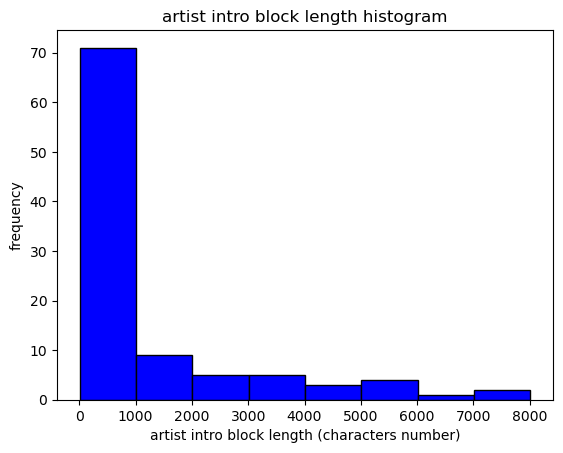

In [4]:
import matplotlib.pyplot as plt

plt.hist(artists_intro_length, bins=8, color='blue', edgecolor='black')
plt.xlabel("artist intro block length (characters number)")
plt.ylabel("frequency")

plt.title("artist intro block length histogram")
plt.show()

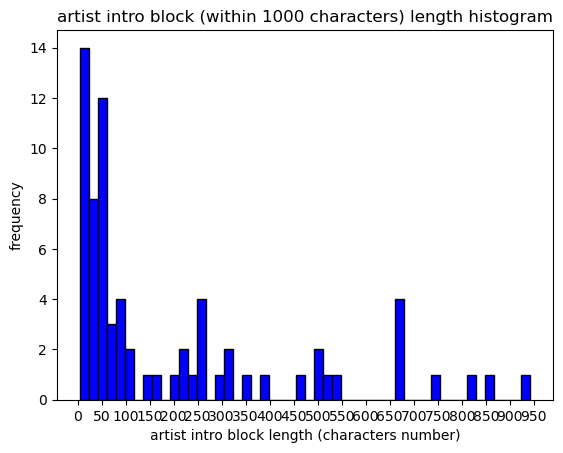

In [5]:
import numpy as np

artists_intro_within1000 = []
for intro_length in artists_intro_length:
    if intro_length <= 1000:
        artists_intro_within1000.append(intro_length)

plt.hist(artists_intro_within1000, bins=50, color='blue', edgecolor='black')
plt.xticks(np.arange(0, 1000, 50))
plt.xlabel("artist intro block length (characters number)")
plt.ylabel("frequency")
plt.title("artist intro block (within 1000 characters) length histogram")
plt.show()

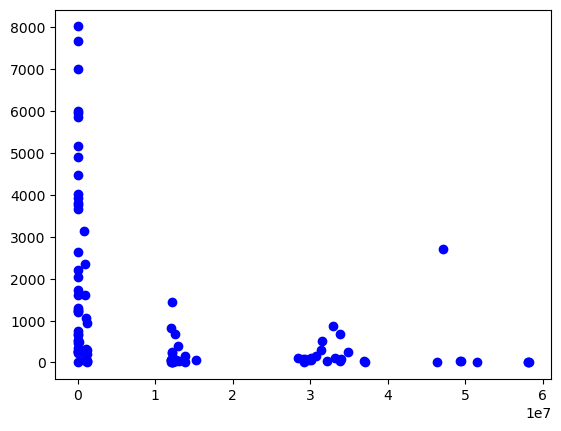

In [6]:
artists_intro_length_arr = np.array(artists_intro_length)
artist_ids = []
for artist in artists_info:
    artist_ids.append(artist['id'])
artist_ids_arr = np.array(artist_ids)

plt.scatter(artist_ids, artists_intro_length_arr, marker='o', color='blue')
plt.show()

根据前两幅图我们得知，即便有些歌手的介绍模块的长度有7000到8000个字符，大多数歌手的介绍还是在1000个字符以内。而在1000字符的歌手介绍模块中，大部分介绍在50个字符一下。这说明大部分歌手的介绍模块相较于最长的介绍是很简短的。

在第三幅图中我们可一发现拥有超长介绍的歌手的id都很靠前，但拥有靠后id的歌手的介绍长度和他们的id没有显著关系。根据网站的规律，id靠前的网页一般都先被建好，所一在前几波次被加入网站的歌手更有可能获得超长介绍。当然，一个更可能的推测是在早期，网站并没有开放对民间歌手的注册权限，而只是在添加明星歌手。明星歌手拥有更多的经历和成就来编写介绍，所以他们的介绍模块很长。最终，这导致了只有早期加入网站的歌手有超长介绍的现象。

In [7]:
SONG_FILE = 'C:/Chris Liu/清华/25暑期/python-course/song_curl/saved_info/song_info/song_intro'

song_files = os.listdir(SONG_FILE)
songs_info = []
for file in song_files:
    with open(f"{SONG_FILE}/{file}", "r", encoding="utf-8") as f:
        song = json.load(f)
        songs_info.append(song)

songs_info

[{'id': '10308019',
  'url': 'https://music.163.com/song?id=10308019',
  'name': '忘记拥抱',
  'artist list': ['潘玮柏'],
  'artist id list': ['4723'],
  'lyrics': '作词 : 张简君伟/葛大为\n作曲 : 张简君伟\n编曲 : 于京延\n你给的回忆太好 像刺青很难抹掉\n我一直保持微笑真的我\n别被你看到\n\n我逃进汹涌人潮 寻找藏身的一角\n我眼泪不敢掉 我快要受不了\n\n忘记了拥抱 忘记了微笑\n忘记我们曾经是那么那么样的好\n我们都太骄傲 话说的太早\n是谁的怀抱 是谁在苦笑\n回过头是谁偷偷把眼泪擦掉\n抱歉是我 傻得可以\n是我 不好\n\n我逃进汹涌人潮 寻找藏身的一角\n我眼泪不敢掉 我快要受不了\n\n忘记了拥抱 忘记了微笑\n忘记我们曾经是那么那么样的好\n我们都太骄傲 话说的太早\n是谁的怀抱 是谁在苦笑\n回过头是谁偷偷把眼泪擦掉\n抱歉是我 傻得可以\n是我 不好\n\n记忆的拼图 没有真心拼凑不了\n幸福的城堡 跌跌撞撞才能看的到\n\n忘记了拥抱 忘记了微笑\n忘记我们曾经是那么那么样的好\n我们都太骄傲 话说的太早\n是谁的怀抱 是谁在苦笑\n回过头是谁偷偷把眼泪擦掉\n抱歉是我 傻得可以\n是我 不好\n\n\n收起'},
 {'id': '108134',
  'url': 'https://music.163.com/song?id=108134',
  'name': '学不会',
  'alias': 'Lost N Found',
  'artist list': ['林俊杰'],
  'artist id list': ['3684'],
  'lyrics': '作词 : 姚若龙\n作曲 : 林俊杰\n编曲 : Terence Teo\n制作人 : 李偲菘\n你的痛苦我都心疼\n想为你解决\n挡开流言 紧握你手\n想飞奔往前\n我相信爱能证明一切\n够真心会超越时间\n多付出也多了喜悦\n让幸福蔓延\n总是学不会再聪明一点\n记得自我保护 必要时候讲些\n善意谎言\n总是学不会\n真爱也有现实面\n不是谁情愿\n就能够解决\n一次争吵 一个心结\n累积着改变 Yeah\

In [15]:
song_artist_num = []
for song in songs_info:
    song_artist_num.append(len(song['artist list']))

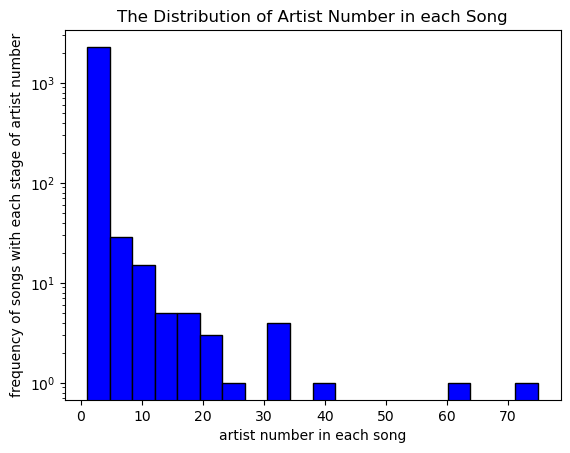

In [26]:
plt.hist(song_artist_num, bins=20, color='blue', edgecolor='black')
plt.yscale('log')
plt.xlabel('artist number in each song')
plt.ylabel('frequency of songs with each stage of artist number')
plt.title('The Distribution of Artist Number in each Song')
plt.show()

In [24]:
import pandas as pd

many_artist_songs = sorted(songs_info, key=lambda x: len(x['artist list']), reverse=True)[:10]
table = pd.DataFrame({
    '歌曲名称': [song['name'] for song in many_artist_songs],
    '歌曲别名': [song.get('alias') for song in many_artist_songs],
    '歌手数量': [len(song['artist list']) for song in many_artist_songs],
    '网址': [song['url'] for song in many_artist_songs],
})

table

,歌曲名称,歌曲别名,歌手数量,网址
0,承诺(香港版),“一方有难，八方支援” 两岸三地演艺界5.12关爱行动主题曲,75,https://music.163.com/song?id=5251209
1,手牵手,2003年抗非典公益歌曲,62,https://music.163.com/song?id=5268423
2,我的祖国,None,39,https://music.163.com/song?id=1483514670
3,唱支山歌给党听(青春版),None,34,https://music.163.com/song?id=1863362787
4,微光,None,32,https://music.163.com/song?id=2015889678
5,披荆斩棘,None,32,https://music.163.com/song?id=2074099995
6,送你一朵小红花 (live),None,32,https://music.163.com/song?id=2639690476
7,东方之珠 (Live),None,26,https://music.163.com/song?id=1959134563
8,祝福 (live),None,23,https://music.163.com/song?id=2675072853
9,我的未来不是梦 (Live版),None,20,https://music.163.com/song?id=2030767034


在爬下来的歌曲中，大部分都只有五个以内的歌手参与了演唱。但是，其中也有小部分歌曲有十位以上的歌手参与演唱，有些歌甚至有50位歌手参与。在这些有多位歌手参与演唱的歌中，我选出了前十个并放在了上面的表格里。可以发现，这十首歌大部分都可以被归为三个类别：公益歌曲、爱国或主旋律歌曲、以及歌曲现场版。